In [ ]:
# Install imbalanced-learn for SMOTE
!pip install -q imbalanced-learn
!pip install -q plotly

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score

from imblearn.over_sampling import SMOTE




In [ ]:
# Load CSV
df = pd.read_csv('creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

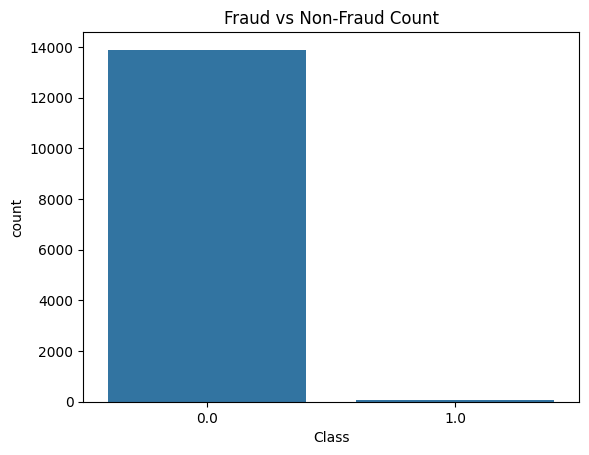

Class
0.0    99.598653
1.0     0.401347
Name: proportion, dtype: float64


In [ ]:
# Basic info
print(df.info())
print(df.describe())

# Check missing values
print(df.isnull().sum())

# Class distribution
sns.countplot(x='Class', data=df)
plt.title('Fraud vs Non-Fraud Count')
plt.show()

# Percentage of fraud cases
fraud_percentage = df['Class'].value_counts(normalize=True) * 100
print(fraud_percentage)


In [ ]:
# --- Safe drop Time ---
if 'Time' in df.columns:
    df = df.drop('Time', axis=1)
    print("Dropped 'Time' column.")
else:
    print("'Time' column not found, continuing...")

# --- Check and Drop NaN rows in 'Class' ---
df = df.dropna(subset=['Class'])

# Check if any missing values in features
if df.isnull().sum().sum() > 0:
    print("Warning: Missing feature values detected!")
    df = df.dropna()
else:
    print("✅ No missing values found.")

# --- Define features and target ---
X = df.drop('Class', axis=1)
y = df['Class']

# --- Scale Amount ---
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# --- Apply SMOTE ---
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print(f"After SMOTE: Class distribution\n{pd.Series(y_train_sm).value_counts()}")


Dropped 'Time' column.
✅ No missing values found.
After SMOTE: Class distribution
Class
0.0    11117
1.0    11117
Name: count, dtype: int64


In [ ]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_sm, y_train_sm)
y_pred_lr = lr.predict(X_test)


In [ ]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_sm, y_train_sm)
y_pred_xgb = xgb.predict(X_test)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:09:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


---Logistic Regression---
Precision: 0.37037037037037035
Recall: 0.9090909090909091
F1-Score: 0.5263157894736842
ROC-AUC: 0.9514879005886201

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2780
         1.0       0.37      0.91      0.53        11

    accuracy                           0.99      2791
   macro avg       0.69      0.95      0.76      2791
weighted avg       1.00      0.99      0.99      2791



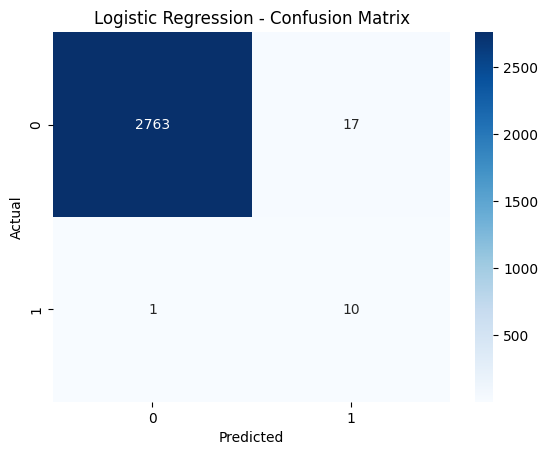

---XGBoost---
Precision: 0.8333333333333334
Recall: 0.9090909090909091
F1-Score: 0.8695652173913043
ROC-AUC: 0.9541857423152389

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2780
         1.0       0.83      0.91      0.87        11

    accuracy                           1.00      2791
   macro avg       0.92      0.95      0.93      2791
weighted avg       1.00      1.00      1.00      2791



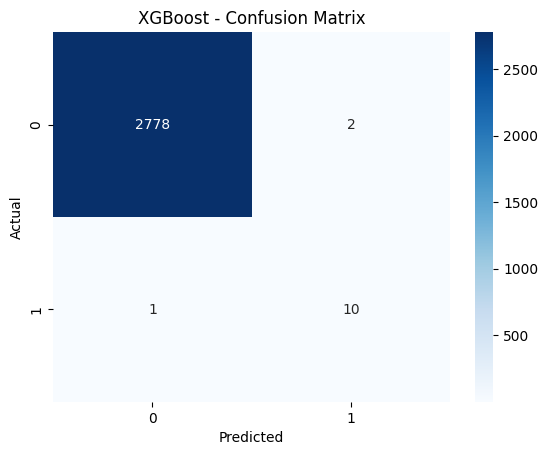

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"---{model_name}---")
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-Score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate all
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

evaluate_model(y_test, y_pred_xgb, "XGBoost")


In [ ]:
y_prob_xgb = xgb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)

fig = px.area(
    x=fpr, y=tpr,
    title=f'ROC Curve (XGBoost)',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    width=700, height=500
)
fig.add_shape(
    type='line', line_dash='dash', line_color='gray',
    x0=0, x1=1, y0=0, y1=1
)
fig.show()


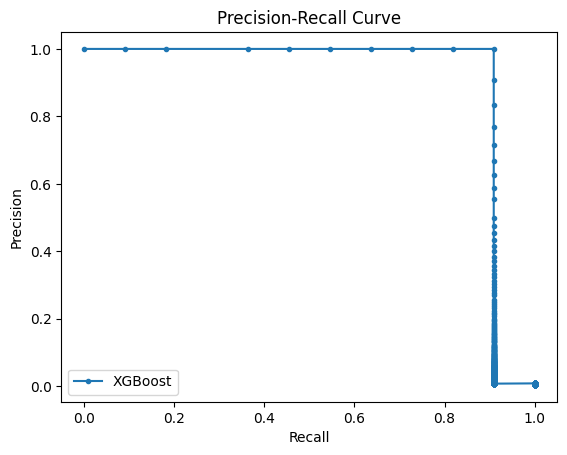

In [ ]:
from sklearn.metrics import precision_recall_curve

# Precision-Recall curve for best model (XGBoost)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_xgb)

plt.plot(recall, precision, marker='.', label='XGBoost')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


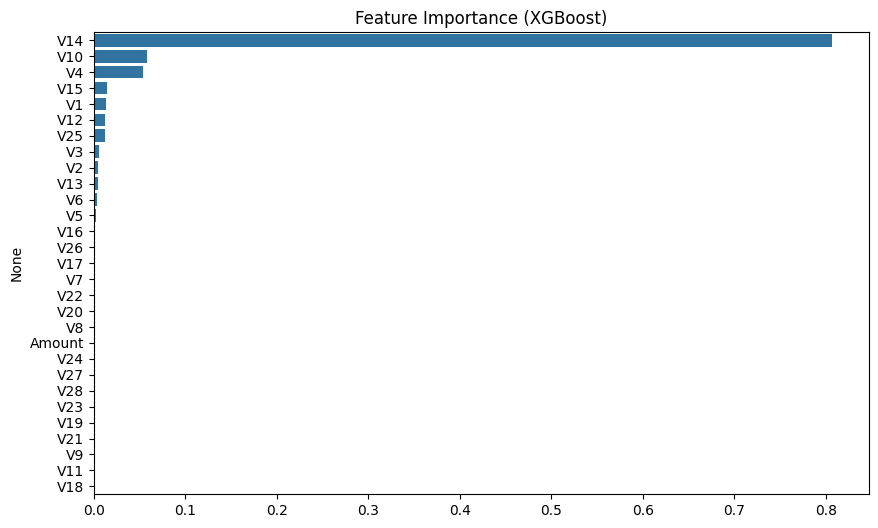

In [ ]:
# Feature Importance from XGBoost
importances = xgb.feature_importances_
features = X.columns

# Plot Feature Importance
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title('Feature Importance (XGBoost)')
plt.show()


In [ ]:
# Assume each fraud costs $500 on average
cost_per_fraud = 500

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)

TP = cm[1,1]  # Fraud caught
FN = cm[1,0]  # Fraud missed

# Business Impact
money_saved = TP * cost_per_fraud
money_lost = FN * cost_per_fraud

print(f"Money Saved by catching frauds: ${money_saved}")
print(f"Money Lost by missing frauds: ${money_lost}")


Money Saved by catching frauds: $5000
Money Lost by missing frauds: $500


In [ ]:
!pip install -q xgboost


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you already loaded the dataset into df

# Drop 'Time' column if it exists
if 'Time' in df.columns:
    df = df.drop('Time', axis=1)

# Define X and y
X = df.drop('Class', axis=1)
y = df['Class']

# Scale 'Amount' column
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# SMOTE to balance fraud class
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("✅ After SMOTE:", pd.Series(y_train_sm).value_counts())


✅ After SMOTE: Class
0.0    11117
1.0    11117
Name: count, dtype: int64


In [ ]:
from xgboost import XGBClassifier

# Define and train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_sm, y_train_sm)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[04:10:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
!pip install -q shap


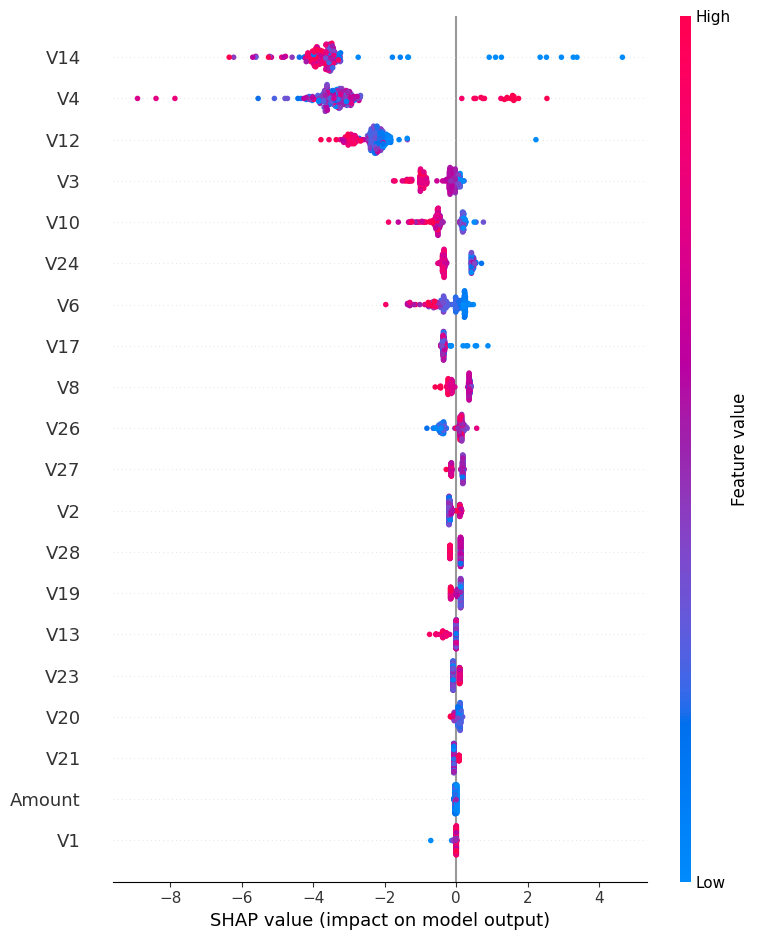

In [ ]:
import shap

# Initialize explainer for tree-based models (like XGBoost)
explainer = shap.TreeExplainer(xgb)

# IMPORTANT: use a small sample if your dataset is big
X_test_sample = X_test.sample(200, random_state=42)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_sample)

# Summary plot
shap.summary_plot(shap_values, X_test_sample)


In [ ]:
 from sklearn.metrics import recall_score

# Also train Logistic Regression and XGBoost beforehand (if not already)

# Make predictions for all models
y_pred_lr = lr.predict(X_test)        # Logistic Regression

y_pred_xgb = xgb.predict(X_test)       # XGBoost

# Compare models by Recall
models = ['Logistic Regression',  'XGBoost']
recalls = [
    recall_score(y_test, y_pred_lr),

    recall_score(y_test, y_pred_xgb)
]

leaderboard = pd.DataFrame({'Model': models, 'Recall Score': recalls})
leaderboard.sort_values(by='Recall Score', ascending=False)


,Model,Recall Score
0,Logistic Regression,0.909091
1,XGBoost,0.909091


In [ ]:
import time

batch_size = 20
for start in range(0, X_test.shape[0], batch_size):
    batch = X_test.iloc[start:start+batch_size]
    preds = xgb.predict(batch)
    frauds = preds.sum()
    print(f"Batch {start}-{start+batch_size}: Fraudulent Transactions Detected = {frauds}")
    time.sleep(1)  # simulate real-time streaming

Batch 0-20: Fraudulent Transactions Detected = 0
Batch 20-40: Fraudulent Transactions Detected = 0
Batch 40-60: Fraudulent Transactions Detected = 0
Batch 60-80: Fraudulent Transactions Detected = 0
Batch 80-100: Fraudulent Transactions Detected = 0
Batch 100-120: Fraudulent Transactions Detected = 0
Batch 120-140: Fraudulent Transactions Detected = 0
Batch 140-160: Fraudulent Transactions Detected = 0
Batch 160-180: Fraudulent Transactions Detected = 1
Batch 180-200: Fraudulent Transactions Detected = 0
Batch 200-220: Fraudulent Transactions Detected = 0
Batch 220-240: Fraudulent Transactions Detected = 0
Batch 240-260: Fraudulent Transactions Detected = 0
Batch 260-280: Fraudulent Transactions Detected = 0
Batch 280-300: Fraudulent Transactions Detected = 0
Batch 300-320: Fraudulent Transactions Detected = 0
Batch 320-340: Fraudulent Transactions Detected = 0
Batch 340-360: Fraudulent Transactions Detected = 1
Batch 360-380: Fraudulent Transactions Detected = 0
Batch 380-400: Fraudul